<a href="https://colab.research.google.com/github/JanaAliCS/machine_leanring/blob/main/session1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Scoring Dataset – First Look
In this session, you will:
- Explore a raw dataset for credit scoring.
- Identify and fix common data quality issues.
- Engineer new features useful for predicting credit risk.

The dataset mimics real-world bank data, with deliberate issues (missing values, outliers, duplicates).

> **Note for Students**  
> This dataset is **synthetic** and created for **academic purposes only**.  
> It is not real customer data, but it mimics some of the real issues (like missing values, inconsistent categories, and outliers) that we often face in actual credit scoring use cases.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For scaling and model later
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Display settings
pd.set_option('display.max_columns', None)

# Section 1: Quick EDA (Exploratory Data Analysis)
Before cleaning and feature engineering, let's understand the dataset.

Goals:
- Check dataset shape and column types
- Inspect distributions of numeric variables
- Explore categorical variables
- Identify issues: missing values, outliers, inconsistencies

### Step 1.1 – Dataset Overview
- Check shape and column types
- Preview first rows

In [2]:
# TODO: Read the CSV file into a DataFrame
df = pd.read_csv("/content/credit_scoring.csv")

In [3]:
# TODO: Preview the first 10 rows of the dataset
# Hint: use df.head(10)
df.head(10)

,customer_id,age,gender,income,employment_type,education,total_debt,balance,credit_limit,late_payments,monthly_balance,default
0,1,38.0,Male,30250.0,Salaried,PhD,25531,8894,10217,2,2541,1
1,2,18.0,Female,18709.0,Salaried,Bachelor,14517,10346,15245,3,2692,1
2,3,34.0,Male,4563.0,Salaried,Master,39234,10962,17609,2,2957,0
3,4,56.0,Female,48782.0,Salaried,Bachelor,12253,21960,12636,3,2398,0
4,5,38.0,Male,47630.0,Self employed,Master,3108,-496,18226,0,4165,0
5,6,24.0,Male,32569.0,Unemployed,High School,15287,13416,16838,1,1395,0
6,7,24.0,Male,16524.0,Self employed,Master,245,9425,9010,1,1827,0
7,8,28.0,Male,14239.0,Salaried,High School,27510,12833,18112,5,3181,0
8,9,31.0,Female,18144.0,Salaried,Master,-650,6713,20181,5,2448,1
9,10,19.0,Male,6008.0,Unemployed,PhD,20284,9755,16028,3,1336,0


In [4]:
# Solved example: dataset shape and info
print("Shape:", df.shape)
df.info()


Shape: (1010, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1010 non-null   int64  
 1   age              960 non-null    float64
 2   gender           1010 non-null   object 
 3   income           990 non-null    float64
 4   employment_type  960 non-null    object 
 5   education        1010 non-null   object 
 6   total_debt       1010 non-null   int64  
 7   balance          1010 non-null   int64  
 8   credit_limit     1010 non-null   int64  
 9   late_payments    1010 non-null   int64  
 10  monthly_balance  1010 non-null   int64  
 11  default          1010 non-null   int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 94.8+ KB


### Step 1.2 – Summary Statistics
- Describe numeric variables
- Count categorical values

In [5]:
# TODO: Use df.info() to check data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1010 non-null   int64  
 1   age              960 non-null    float64
 2   gender           1010 non-null   object 
 3   income           990 non-null    float64
 4   employment_type  960 non-null    object 
 5   education        1010 non-null   object 
 6   total_debt       1010 non-null   int64  
 7   balance          1010 non-null   int64  
 8   credit_limit     1010 non-null   int64  
 9   late_payments    1010 non-null   int64  
 10  monthly_balance  1010 non-null   int64  
 11  default          1010 non-null   int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 94.8+ KB


In [6]:
# TODO: Check value counts for 'employment_type'

df['employment_type'].value_counts()

,count
employment_type,
Salaried,578
Self-Employed,156
Self employed,143
Unemployed,83


### Step 1.3 – Missing Values
- Identify columns with NaN
- Check proportions of missing


*Explanation*: Missing values can bias results. Small amounts may be dropped, but important fields are often imputed with logical strategies.

In [7]:

# TODO: Find missing values in each column
# Hint: use df.isnull().sum()
df.isnull().sum()

,0
customer_id,0
age,50
gender,0
income,20
employment_type,50
education,0
total_debt,0
balance,0
credit_limit,0
late_payments,0


### Step 1.4 – Distributions & Outliers
- Plot histograms for numeric columns
- Use boxplots to detect outliers


*Explanation*: Visualizing distributions helps detect skewness, outliers, or unrealistic values (e.g., negative income).

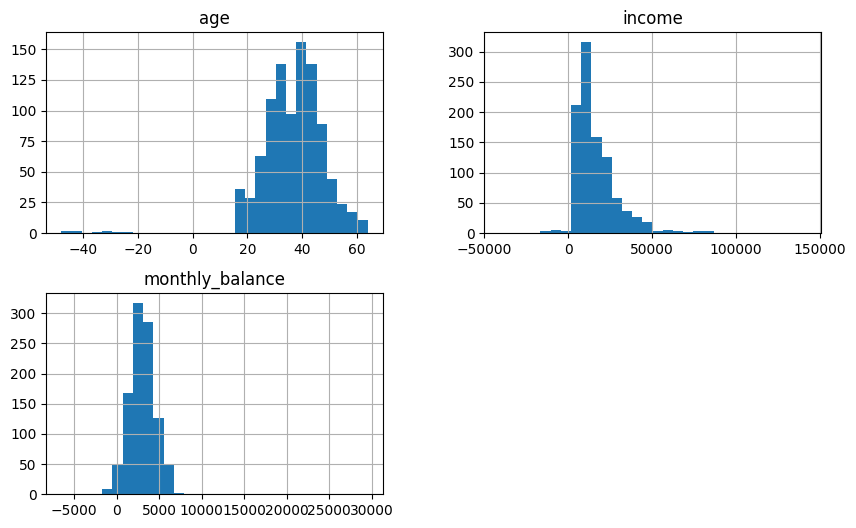

In [8]:
# Solved example: histogram of numeric features
df[['age','income','monthly_balance']].hist(bins=30, figsize=(10,6))
plt.show()


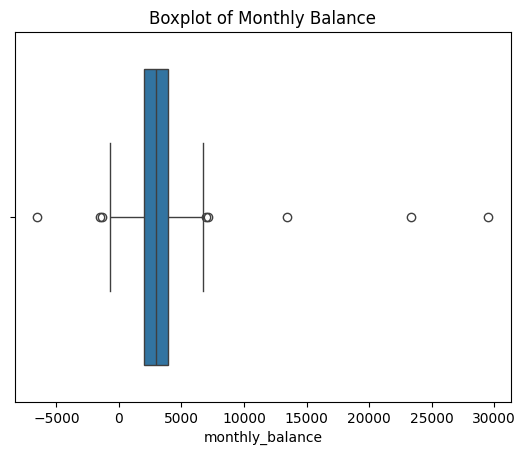

In [10]:
# TODO: Create a boxplot to check for outliers in monthly_balance

sns.boxplot(x=df['monthly_balance'])
plt.title("Boxplot of Monthly Balance")
plt.show()

### Step 1.5 – Target Variable
- Check distribution of the target
- See if classes are balanced (default vs non-default)

*Explanation*: Checking class balance is critical. If imbalanced, advanced techniques like resampling or weighted models may be needed.

In [12]:

# TODO: Print raw counts of default vs non-default instead of percentages
default_counts = df['default'].value_counts().reset_index()
default_counts.columns = ['Default_Status', 'Count']
print(default_counts)


   Default_Status  Count
0               0    802
1               1    208


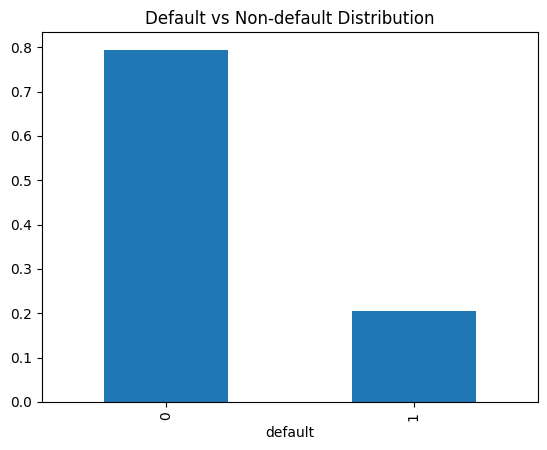

In [13]:

# Solved example: target variable distribution
df['default'].value_counts(normalize=True).plot(kind='bar')
plt.title("Default vs Non-default Distribution")
plt.show()


# Section 2: Data Cleaning
Now we fix issues found in EDA.

Goals:
- Handle missing values, duplicates, and outliers.
- Standardize categories and check data consistency.


### Step 2.1 – Handle Missing Values
Choose a strategy:
- Drop rows
- Fill with mean/median/mode
- Use domain knowledge (e.g., income → "Unknown")


*Explanation*: Imputation choice depends on distribution. Median is safer with skewed data (like income), while mean works for symmetric data.

In [17]:

# TODO: Fill missing values for 'age' and 'employment_type'
df['age'].fillna(df['age'].mean(), inplace=True)
df['employment_type'].fillna(df['employment_type'].mode()[0], inplace=True)

/tmp/ipython-input-4255420864.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].mean(), inplace=True)


In [18]:
# Solved example: Fill missing income with median
df['income'] = df['income'].fillna(df['income'].median())

### Step 2.2 – Remove Duplicates
- Check duplicate rows
- Drop if necessary

*Explanation*: Duplicates usually arise from repeated entries. Always confirm before dropping, since some repeats may be legitimate.

In [19]:

# TODO: Remove duplicate rows from the dataset
df.drop_duplicates(inplace=True)

### Step 2.3 – Standardize Categories
- Fix inconsistent labels
- Ensure uniform formatting (e.g., lowercase)


*Explanation*: Standardizing categories avoids treating 'Self employed' and 'self-employed' as separate groups.

In [20]:

# TODO: Standardize categories in 'employment_type'
# Hint: lowercase and strip spaces
df['employment_type'] = df['employment_type'].str.lower().str.strip()

### Step 2.4 – Treat Outliers
- Cap extreme values
- Or replace with thresholds

*Explanation*: Outliers can heavily influence models. Options include capping, transformation (log), or removal.

In [21]:

# TODO: Experiment with removing rows instead of capping outliers
lower_bound = df['monthly_balance'].quantile(0.01)
upper_bound = df['monthly_balance'].quantile(0.99)

df_no_outliers = df[(df['monthly_balance'] >= lower_bound) & (df['monthly_balance'] <= upper_bound)]


In [22]:

# Solved example: cap outliers at 99th percentile
cap = df['monthly_balance'].quantile(0.99)
df['monthly_balance'] = np.where(df['monthly_balance'] > cap, cap, df['monthly_balance'])


### Step 2.5 – Validate Logic
- Check impossible values (e.g., negative age)

In [23]:

# Solved example: fix negative ages
df['age'] = np.where(df['age'] < 0, abs(df['age']), df['age'])


# Section 3: Feature Engineering
We create new features that add business insight.

Goals:
- Encode categorical variables.
- Build useful ratios (e.g., debt-to-income, credit utilization).
- Group variables (e.g., age buckets).

### Step 3.1 – Encode Categorical Variables
- Convert categories into numeric form (e.g., one-hot encoding)
- Avoid implying order in non-ordinal categories

*Explanation*: Encoding turns categories into numeric form. One-hot encoding avoids implying order in non-ordinal categories.


In [24]:

# TODO: Encode other categorical variables like 'employment_type' and 'gender'
df = pd.get_dummies(df, columns=['employment_type', 'gender'], drop_first=True)


In [25]:
# Solved example: encode 'education'
df = pd.get_dummies(df, columns=['education'], drop_first=True)


### Step 3.2 – Create Ratios
- Debt-to-Income Ratio
- Credit Utilization (%)

*Explanation*: Ratios like debt-to-income capture relative financial health better than raw numbers.


In [26]:

# TODO: Create a new feature: debt minus balance (remaining debt)
remaining_debt = df['total_debt'] - df['monthly_balance']
df['remaining_debt'] = remaining_debt

In [27]:

# TODO: Create credit utilization (balance / credit_limit)
credit_utilization = df['monthly_balance'] / df['credit_limit']
df['credit_utilization'] = credit_utilization

In [28]:
# Solved example: Debt-to-Income ratio
df['debt_to_income'] = df['total_debt'] / (df['income']+1)


### Step 3.3 – Group Continuous Variables
- Age buckets
- Income ranges

*Explanation*: Bucketing continuous variables can reveal non-linear relationships (e.g., young borrowers may behave differently).  
It also makes it easier to compare customers across categories (e.g., low-income vs high-income).


In [30]:
df['age_group'] = pd.cut(df['age'], bins=[18,30,50,100], labels=['Young','Mid','Senior'])

# TODO: Create alternative age groups with different splits
df['age_group_alt'] = pd.cut(
    df['age'],
    bins=[18, 25, 40, 60, 100],
    labels=['Youth', 'Young Adult', 'Adult', 'Senior']
)


# TODO: Create income ranges

df['income_group'] = pd.cut(
    df['income'],
    bins=[0, 3000, 7000, 15000, 142000],     # adjust based on your data scale
    labels=['Low', 'Lower-Mid', 'Upper-Mid', 'High']
)

In [29]:
df['income'].describe()


,income
count,1010.000000
mean,16661.591089
std,14126.795220
min,-40973.000000
25%,8148.250000
50%,12808.000000
75%,21292.500000
max,141531.000000


## Bonus Homework – Logistic Regression Model

For extra practice, try building a simple model to predict `default`:

Steps you might consider:
- Split the dataset into train/test sets.
- Choose relevant features (hint: numeric ones work directly, categories need encoding).
- Fit a Logistic Regression model.
- Evaluate using accuracy, precision, and recall.

   *Hint*: Look at scikit-learn's `LogisticRegression` and `train_test_split`.

This is optional and meant as bonus homework, not part of the live session.


In [32]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   customer_id                    1010 non-null   int64   
 1   age                            1010 non-null   float64 
 2   income                         1010 non-null   float64 
 3   total_debt                     1010 non-null   int64   
 4   balance                        1010 non-null   int64   
 5   credit_limit                   1010 non-null   int64   
 6   late_payments                  1010 non-null   int64   
 7   monthly_balance                1010 non-null   float64 
 8   default                        1010 non-null   int64   
 9   employment_type_self employed  1010 non-null   bool    
 10  employment_type_self-employed  1010 non-null   bool    
 11  employment_type_unemployed     1010 non-null   bool    
 12  gender_Male                    101

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

features = [
    'age', 'income', 'total_debt', 'balance', 'credit_limit', 'late_payments',
    'monthly_balance', 'remaining_debt', 'credit_utilization', 'debt_to_income',
    'employment_type_self employed', 'employment_type_self-employed', 'employment_type_unemployed',
    'gender_Male', 'education_High School', 'education_Master', 'education_PhD']

target = 'default'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=10000000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#evaluation
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF F,G EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
